# Analysis Of KXIP vs RR

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
Matches=pd.read_csv("matches.csv")

In [3]:
Matches.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN


# How many rows and columns are there?#  

In [4]:
Matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

# Match details

In [5]:
Matches.describe

<bound method NDFrame.describe of         id  season           city        date                        team1  \
0        1    2017      Hyderabad  2017-04-05          Sunrisers Hyderabad   
1        2    2017           Pune  2017-04-06               Mumbai Indians   
2        3    2017         Rajkot  2017-04-07                Gujarat Lions   
3        4    2017         Indore  2017-04-08       Rising Pune Supergiant   
4        5    2017      Bangalore  2017-04-08  Royal Challengers Bangalore   
..     ...     ...            ...         ...                          ...   
751  11347    2019         Mumbai    05/05/19        Kolkata Knight Riders   
752  11412    2019        Chennai    07/05/19          Chennai Super Kings   
753  11413    2019  Visakhapatnam    08/05/19          Sunrisers Hyderabad   
754  11414    2019  Visakhapatnam    10/05/19               Delhi Capitals   
755  11415    2019      Hyderabad    12/05/19               Mumbai Indians   

                           te

In [6]:
Matches.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [7]:
print("No of Rows are:",len(Matches))
print("No of columns are:",len(Matches.columns))

No of Rows are: 756
No of columns are: 18


#  756 rows are there that means we have details 756 matches that takes place between 2008-2019 

In [8]:
print("No of matches that takes place between 2008-2019 were:",len(Matches))

No of matches that takes place between 2008-2019 were: 756


# It looks like between 2011-2013.Total no matches exceeds 70.That because in these periods(2011-2013)there were 10 teams(kochi tuskers kerala and pune warriors india were the new additions

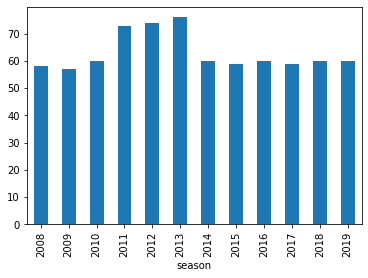

In [9]:
year_wise_analysing=Matches.groupby('season')
year_wise_analysing.count()
year_wise_analysing['id'].count().plot(kind='bar')

In [10]:
year_wise_analysing['id'].count()

season
2008    58
2009    57
2010    60
2011    73
2012    74
2013    76
2014    60
2015    59
2016    60
2017    59
2018    60
2019    60
Name: id, dtype: int64

In [11]:
Matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

## from the below plot we can find huge missing values are there in umpire 3 columns .we can remove the column it will not create a impact on predicting the matches.#  

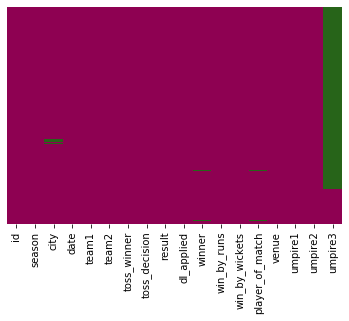

In [12]:
sns.heatmap(Matches.isnull(),yticklabels=False,cbar=False,cmap='PiYG')

#  Removed the columns containing more missing values and have less impact on the predicting matches


In [13]:
Matchess=Matches.drop(['umpire3','city'],axis=1)

In [14]:
Matchess.head(2)

,id,season,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi


#  No missing values are there(well some small amount are still there but will not have impact on Today's match)

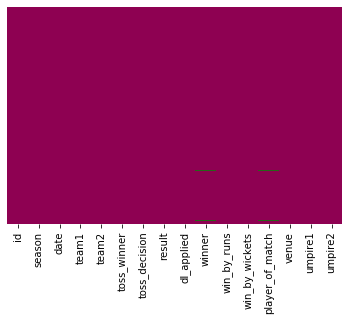

In [15]:
sns.heatmap(Matchess.isnull(),yticklabels=False,cbar=False,cmap='PiYG')

#  Today's match is between Rajastan Royals(RR) and Kings XI Punjab(KXIP).so we only want information between the matches that had take place between them.

In [17]:
KXIP_RR1=Matches.loc[(Matches['team1']=='Rajasthan Royals')&(Matches['team2'] =='Kings XI Punjab')]
KXIP_RR1

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
144,145,2009,Durban,2009-05-05,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,normal,0,Rajasthan Royals,78,0,GC Smith,Kingsmead,SS Hazare,IL Howell,NaN
192,193,2010,Chandigarh,2010-03-24,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,normal,0,Rajasthan Royals,31,0,AC Voges,"Punjab Cricket Association Stadium, Mohali",BR Doctrove,SK Tarapore,NaN
310,311,2012,Jaipur,2012-04-06,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,normal,0,Rajasthan Royals,31,0,AM Rahane,Sawai Mansingh Stadium,BF Bowden,SK Tarapore,NaN
353,354,2012,Chandigarh,2012-05-05,Rajasthan Royals,Kings XI Punjab,Rajasthan Royals,bat,normal,0,Rajasthan Royals,43,0,SR Watson,"Punjab Cricket Association Stadium, Mohali",JD Cloete,SJA Taufel,NaN
463,464,2014,Sharjah,2014-04-20,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,7,GJ Maxwell,Sharjah Cricket Stadium,BF Bowden,M Erasmus,NaN
519,520,2015,Pune,2015-04-10,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,normal,0,Rajasthan Royals,26,0,JP Faulkner,Maharashtra Cricket Association Stadium,SD Fry,CB Gaffaney,NaN
535,536,2015,Ahmedabad,2015-04-21,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,tie,0,Kings XI Punjab,0,0,SE Marsh,"Sardar Patel Stadium, Motera",M Erasmus,S Ravi,NaN
673,7931,2018,Indore,06/05/18,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,M Ur Rahman,Holkar Cricket Stadium,C Shamshuddin,S Ravi,Anil Dandekar
675,7933,2018,Jaipur,08/05/18,Rajasthan Royals,Kings XI Punjab,Rajasthan Royals,bat,normal,0,Rajasthan Royals,15,0,JC Buttler,Sawai Mansingh Stadium,Marais Erasmus,Nitin Menon,Yeshwant Barde


In [18]:
KXIP_RR2=Matches.loc[(Matches['team2']=='Rajasthan Royals')&(Matches['team1'] =='Kings XI Punjab')]

In [19]:
KXIP_RR2

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
64,65,2008,Jaipur,2008-04-21,Kings XI Punjab,Rajasthan Royals,Kings XI Punjab,bat,normal,0,Rajasthan Royals,0,6,SR Watson,Sawai Mansingh Stadium,Aleem Dar,RB Tiffin,NaN
96,97,2008,Chandigarh,2008-05-28,Kings XI Punjab,Rajasthan Royals,Rajasthan Royals,field,normal,0,Kings XI Punjab,41,0,SE Marsh,"Punjab Cricket Association Stadium, Mohali",SJ Davis,K Hariharan,NaN
129,130,2009,Cape Town,2009-04-26,Kings XI Punjab,Rajasthan Royals,Kings XI Punjab,bat,normal,0,Kings XI Punjab,27,0,KC Sangakkara,Newlands,M Erasmus,K Hariharan,NaN
211,212,2010,Jaipur,2010-04-07,Kings XI Punjab,Rajasthan Royals,Kings XI Punjab,bat,normal,0,Rajasthan Royals,0,9,MJ Lumb,Sawai Mansingh Stadium,S Ravi,SK Tarapore,NaN
255,256,2011,Chandigarh,2011-04-21,Kings XI Punjab,Rajasthan Royals,Rajasthan Royals,field,normal,0,Kings XI Punjab,48,0,SE Marsh,"Punjab Cricket Association Stadium, Mohali",S Asnani,PR Reiffel,NaN
397,398,2013,Jaipur,2013-04-14,Kings XI Punjab,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,6,JP Faulkner,Sawai Mansingh Stadium,Aleem Dar,C Shamshuddin,NaN
435,436,2013,Chandigarh,2013-05-09,Kings XI Punjab,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,8,KK Cooper,"Punjab Cricket Association Stadium, Mohali",HDPK Dharmasena,S Ravi,NaN
508,509,2014,Chandigarh,2014-05-23,Kings XI Punjab,Rajasthan Royals,Rajasthan Royals,field,normal,0,Kings XI Punjab,16,0,SE Marsh,"Punjab Cricket Association Stadium, Mohali",HDPK Dharmasena,PG Pathak,NaN
699,11140,2019,Jaipur,25/03/19,Kings XI Punjab,Rajasthan Royals,Rajasthan Royals,field,normal,0,Kings XI Punjab,14,0,CH Gayle,Sawai Mansingh Stadium,C Shamshuddin,KN Anantapadmanabhan,Bruce Oxenford
727,11323,2019,Mohali,16/04/19,Kings XI Punjab,Rajasthan Royals,Rajasthan Royals,field,normal,0,Kings XI Punjab,12,0,R Ashwin,IS Bindra Stadium,Anil Chaudhary,Vineet Kulkarni,S Ravi


In [21]:
KXIP_RR=KXIP_RR1.append(KXIP_RR2)

In [22]:
KXIP_RR

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
144,145,2009,Durban,2009-05-05,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,normal,0,Rajasthan Royals,78,0,GC Smith,Kingsmead,SS Hazare,IL Howell,NaN
192,193,2010,Chandigarh,2010-03-24,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,normal,0,Rajasthan Royals,31,0,AC Voges,"Punjab Cricket Association Stadium, Mohali",BR Doctrove,SK Tarapore,NaN
310,311,2012,Jaipur,2012-04-06,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,normal,0,Rajasthan Royals,31,0,AM Rahane,Sawai Mansingh Stadium,BF Bowden,SK Tarapore,NaN
353,354,2012,Chandigarh,2012-05-05,Rajasthan Royals,Kings XI Punjab,Rajasthan Royals,bat,normal,0,Rajasthan Royals,43,0,SR Watson,"Punjab Cricket Association Stadium, Mohali",JD Cloete,SJA Taufel,NaN
463,464,2014,Sharjah,2014-04-20,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,7,GJ Maxwell,Sharjah Cricket Stadium,BF Bowden,M Erasmus,NaN
519,520,2015,Pune,2015-04-10,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,normal,0,Rajasthan Royals,26,0,JP Faulkner,Maharashtra Cricket Association Stadium,SD Fry,CB Gaffaney,NaN
535,536,2015,Ahmedabad,2015-04-21,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,tie,0,Kings XI Punjab,0,0,SE Marsh,"Sardar Patel Stadium, Motera",M Erasmus,S Ravi,NaN
673,7931,2018,Indore,06/05/18,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,M Ur Rahman,Holkar Cricket Stadium,C Shamshuddin,S Ravi,Anil Dandekar
675,7933,2018,Jaipur,08/05/18,Rajasthan Royals,Kings XI Punjab,Rajasthan Royals,bat,normal,0,Rajasthan Royals,15,0,JC Buttler,Sawai Mansingh Stadium,Marais Erasmus,Nitin Menon,Yeshwant Barde
64,65,2008,Jaipur,2008-04-21,Kings XI Punjab,Rajasthan Royals,Kings XI Punjab,bat,normal,0,Rajasthan Royals,0,6,SR Watson,Sawai Mansingh Stadium,Aleem Dar,RB Tiffin,NaN


In [23]:
KXIP_RR.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19 entries, 144 to 727
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               19 non-null     int64 
 1   season           19 non-null     int64 
 2   city             19 non-null     object
 3   date             19 non-null     object
 4   team1            19 non-null     object
 5   team2            19 non-null     object
 6   toss_winner      19 non-null     object
 7   toss_decision    19 non-null     object
 8   result           19 non-null     object
 9   dl_applied       19 non-null     int64 
 10  winner           19 non-null     object
 11  win_by_runs      19 non-null     int64 
 12  win_by_wickets   19 non-null     int64 
 13  player_of_match  19 non-null     object
 14  venue            19 non-null     object
 15  umpire1          19 non-null     object
 16  umpire2          19 non-null     object
 17  umpire3          4 non-null      o

# # Complete details of matches that takes placed between KXIP and RR

In [24]:
KXIP_RR.describe

<bound method NDFrame.describe of         id  season        city        date             team1  \
144    145    2009      Durban  2009-05-05  Rajasthan Royals   
192    193    2010  Chandigarh  2010-03-24  Rajasthan Royals   
310    311    2012      Jaipur  2012-04-06  Rajasthan Royals   
353    354    2012  Chandigarh  2012-05-05  Rajasthan Royals   
463    464    2014     Sharjah  2014-04-20  Rajasthan Royals   
519    520    2015        Pune  2015-04-10  Rajasthan Royals   
535    536    2015   Ahmedabad  2015-04-21  Rajasthan Royals   
673   7931    2018      Indore    06/05/18  Rajasthan Royals   
675   7933    2018      Jaipur    08/05/18  Rajasthan Royals   
64      65    2008      Jaipur  2008-04-21   Kings XI Punjab   
96      97    2008  Chandigarh  2008-05-28   Kings XI Punjab   
129    130    2009   Cape Town  2009-04-26   Kings XI Punjab   
211    212    2010      Jaipur  2010-04-07   Kings XI Punjab   
255    256    2011  Chandigarh  2011-04-21   Kings XI Punjab   
397   

In [25]:
print("No of matches that takes place between KXIP and DC:",len(KXIP_RR))

No of matches that takes place between KXIP and DC: 19


#  Below plot gives the details of the match that takes place between RR and KXIP

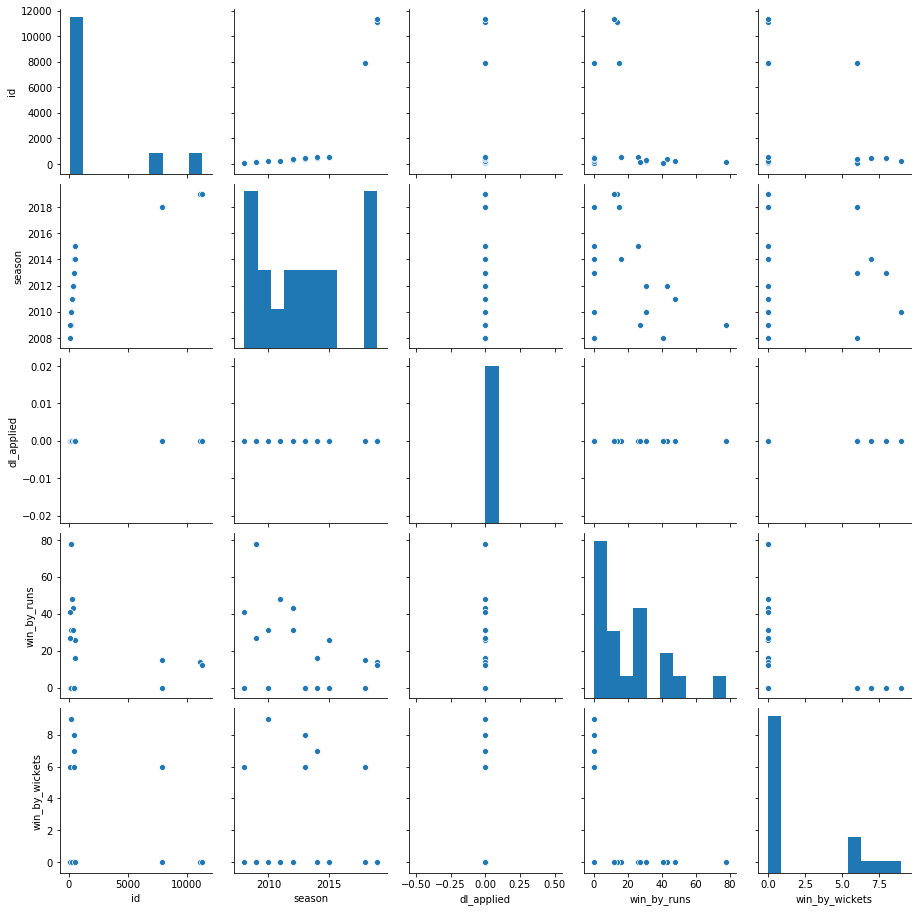

In [26]:
sns.pairplot(KXIP_RR)

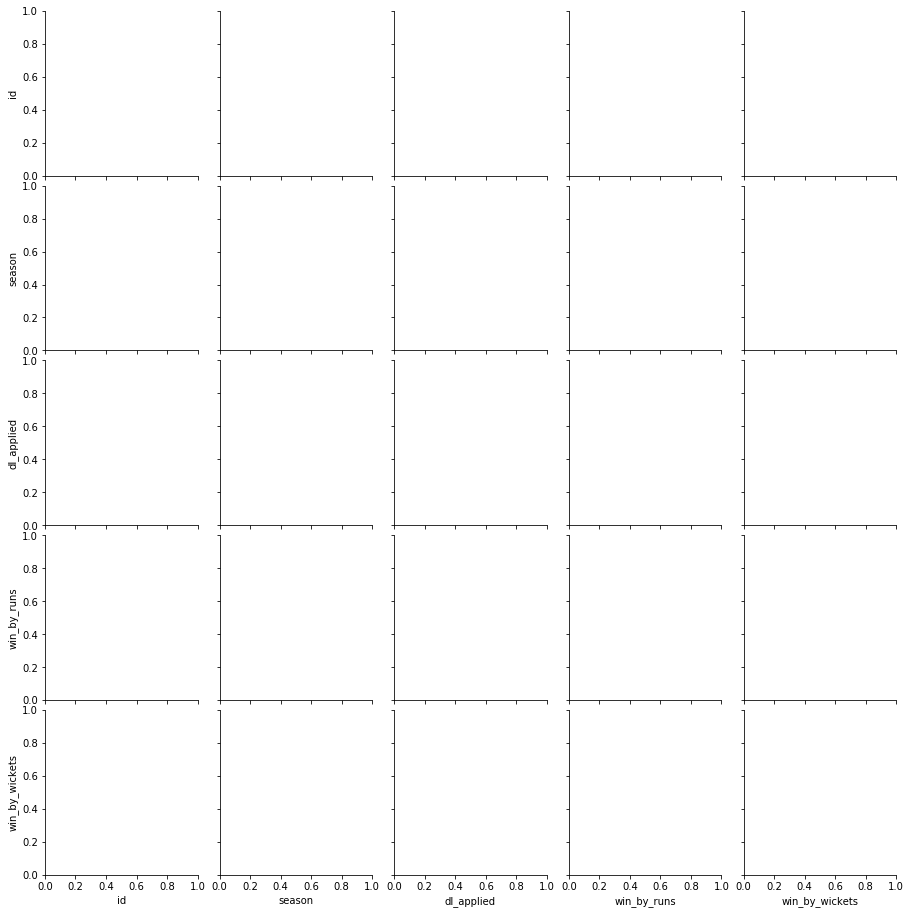

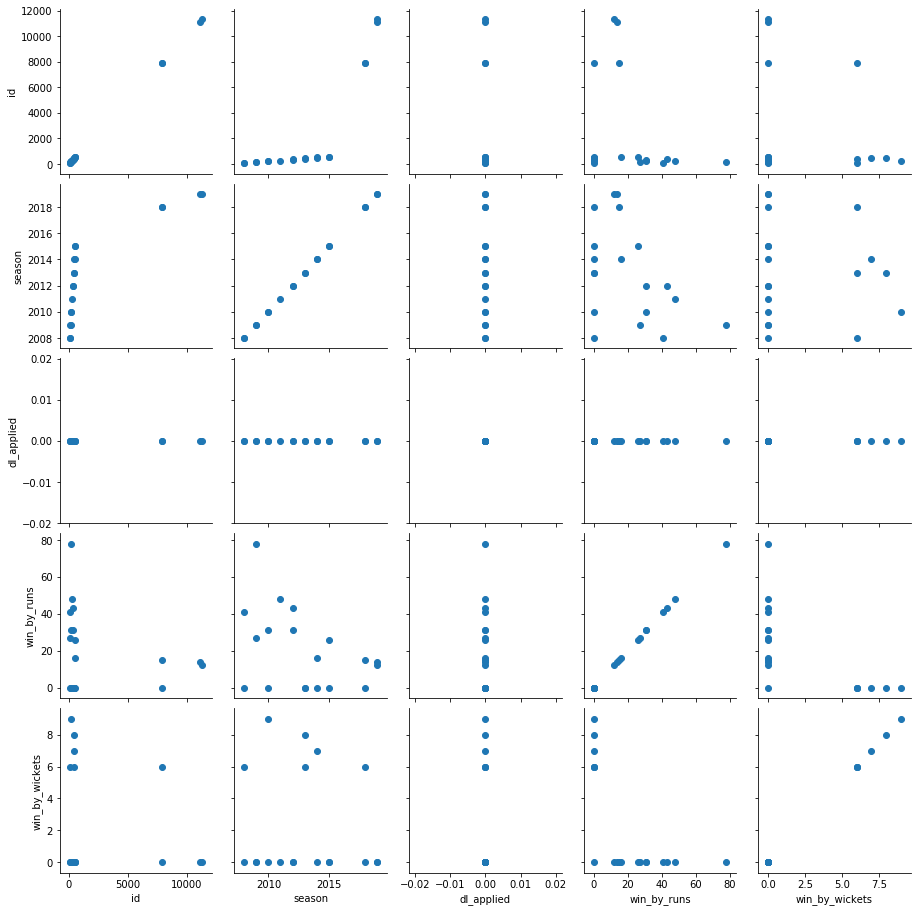

In [27]:
sns.PairGrid(KXIP_RR)
g=sns.PairGrid(KXIP_RR)
g.map(plt.scatter)

#  It looks like  KXIP win the Toss 10 Times and 9 Times RR won the Toss

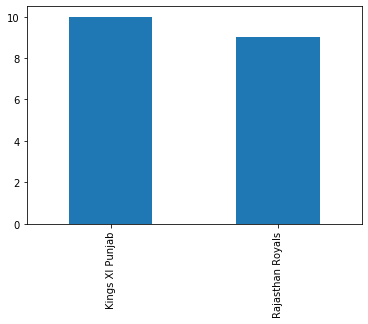

In [28]:
KXIP_RR['toss_winner'].value_counts().plot(kind='bar')

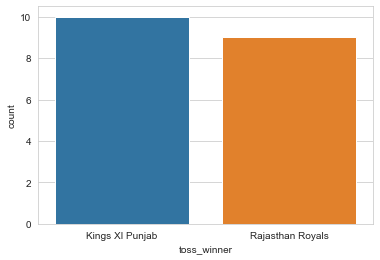

In [29]:
sns.set_style('whitegrid')
sns.countplot(x='toss_winner',data=KXIP_RR)

# RR went on to win the match 4 times by  batting first and 6 times by Batting Second against KXIP .so total it is (RR=win-10,loss-9)whereas for KXIP they win the match 1 time by batting first and win 8 times by batting first against SRH.so it is (KXIP=win-9,loss=10)

In [30]:
KXIP_RR.tail(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
699,11140,2019,Jaipur,25/03/19,Kings XI Punjab,Rajasthan Royals,Rajasthan Royals,field,normal,0,Kings XI Punjab,14,0,CH Gayle,Sawai Mansingh Stadium,C Shamshuddin,KN Anantapadmanabhan,Bruce Oxenford
727,11323,2019,Mohali,16/04/19,Kings XI Punjab,Rajasthan Royals,Rajasthan Royals,field,normal,0,Kings XI Punjab,12,0,R Ashwin,IS Bindra Stadium,Anil Chaudhary,Vineet Kulkarni,S Ravi


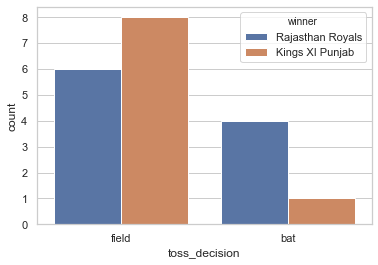

In [31]:
import sys
sys.setrecursionlimit(2000)
sns.set()
sns.set_style('whitegrid')
sns.countplot(x='toss_decision',hue="winner",data=KXIP_RR)

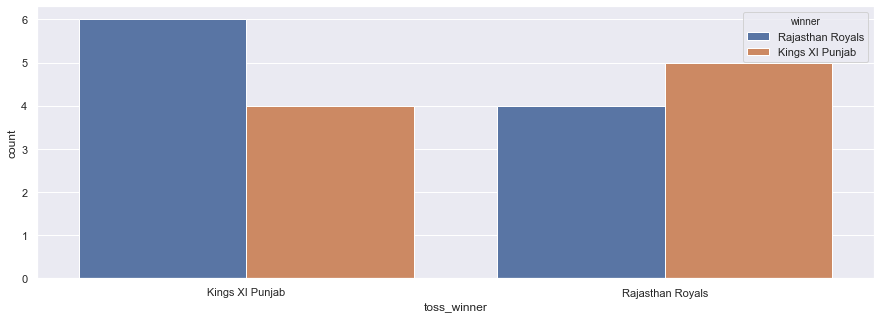

In [32]:
sns.set({'figure.figsize':(15,5)})
sns.countplot(x='toss_winner',hue="winner",data=KXIP_RR)

In [33]:
print("No of times toss won by both teams:")
KXIP_RR['toss_winner'].value_counts()

No of times toss won by both teams:


Kings XI Punjab     10
Rajasthan Royals     9
Name: toss_winner, dtype: int64

# Punjab win 9 times and Rajastan win 10 times from 19 matches

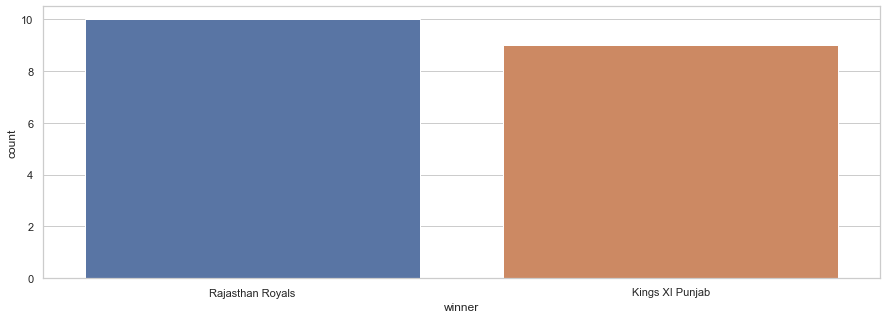

In [34]:
sns.set_style('whitegrid')
sns.countplot(x='winner',data=KXIP_RR)

# correlation between Columns in Matches Dataset

In [35]:
KXIP_RR.corr()

,id,season,dl_applied,win_by_runs,win_by_wickets
id,1.000000,0.820496,NaN,-0.239699,-0.147767
season,0.820496,1.000000,NaN,-0.416922,-0.089641
dl_applied,NaN,NaN,NaN,NaN,NaN
win_by_runs,-0.239699,-0.416922,NaN,1.000000,-0.637602
win_by_wickets,-0.147767,-0.089641,NaN,-0.637602,1.000000


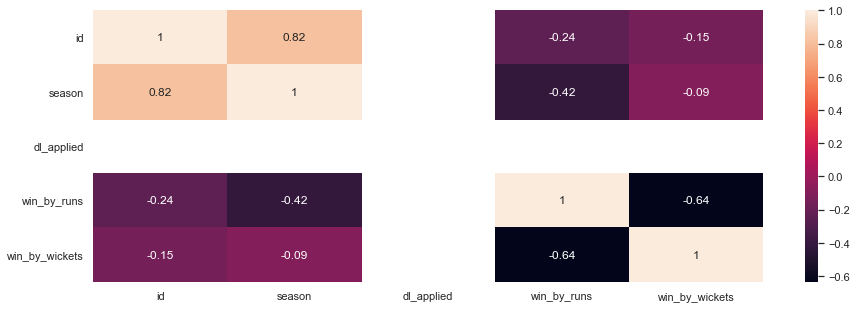

In [36]:
sns.heatmap(KXIP_RR.corr(),yticklabels=True,annot=True)

In [37]:
KXIP_RR['winner']=pd.get_dummies(KXIP_RR['winner'])

In [38]:
KXIP_RR.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
144,145,2009,Durban,2009-05-05,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,normal,0,0,78,0,GC Smith,Kingsmead,SS Hazare,IL Howell,NaN
192,193,2010,Chandigarh,2010-03-24,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,normal,0,0,31,0,AC Voges,"Punjab Cricket Association Stadium, Mohali",BR Doctrove,SK Tarapore,NaN


# Using Sweetviz we can get details about the Matches

In [40]:
import sweetviz 
my_report=sweetviz.analyze([KXIP_RR,'KXIP_RR'],target_feat='winner')

:FEATURES DONE:                    |█████████████████████| [100%]   00:12  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)


Creating Associations graph... DONE!


In [50]:
my_report.show_html("Report1.html")

#  Now let get into the Deliveries Dataset

In [41]:
Deliveries=pd.read_csv("deliveries.csv")

In [42]:
Deliveries.head(5)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [43]:
Deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [44]:
Deliveries.describe

<bound method NDFrame.describe of         match_id  inning         batting_team                 bowling_team  \
0              1       1  Sunrisers Hyderabad  Royal Challengers Bangalore   
1              1       1  Sunrisers Hyderabad  Royal Challengers Bangalore   
2              1       1  Sunrisers Hyderabad  Royal Challengers Bangalore   
3              1       1  Sunrisers Hyderabad  Royal Challengers Bangalore   
4              1       1  Sunrisers Hyderabad  Royal Challengers Bangalore   
...          ...     ...                  ...                          ...   
179073     11415       2  Chennai Super Kings               Mumbai Indians   
179074     11415       2  Chennai Super Kings               Mumbai Indians   
179075     11415       2  Chennai Super Kings               Mumbai Indians   
179076     11415       2  Chennai Super Kings               Mumbai Indians   
179077     11415       2  Chennai Super Kings               Mumbai Indians   

        over  ball    batsman

# Filtering the match details that only takes place between Rajatsn Royals and  Kings XI Punjab

In [47]:
Rajastan_Punjab1=Deliveries.loc[(Deliveries['batting_team' ] =='Kings XI Punjab' ) & (Deliveries['bowling_team'] == 'Rajasthan Royals')]

In [48]:
Rajastan_Punjab1         

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
15040,65,1,Kings XI Punjab,Rajasthan Royals,1,1,K Goel,JR Hopes,MM Patel,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
15041,65,1,Kings XI Punjab,Rajasthan Royals,1,2,K Goel,JR Hopes,MM Patel,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
15042,65,1,Kings XI Punjab,Rajasthan Royals,1,3,K Goel,JR Hopes,MM Patel,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
15043,65,1,Kings XI Punjab,Rajasthan Royals,1,4,K Goel,JR Hopes,MM Patel,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
15044,65,1,Kings XI Punjab,Rajasthan Royals,1,5,K Goel,JR Hopes,MM Patel,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172400,11323,1,Kings XI Punjab,Rajasthan Royals,20,2,R Ashwin,M Ur Rahman,DS Kulkarni,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
172401,11323,1,Kings XI Punjab,Rajasthan Royals,20,3,R Ashwin,M Ur Rahman,DS Kulkarni,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
172402,11323,1,Kings XI Punjab,Rajasthan Royals,20,4,M Ur Rahman,R Ashwin,DS Kulkarni,0,...,0,1,0,0,1,1,2,NaN,NaN,NaN
172403,11323,1,Kings XI Punjab,Rajasthan Royals,20,5,R Ashwin,M Ur Rahman,DS Kulkarni,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN


In [49]:
Rajastan_Punjab2=Deliveries.loc[(Deliveries['bowling_team' ] =='Kings XI Punjab' ) & (Deliveries['batting_team'] == 'Rajasthan Royals')]

In [50]:
Rajastan_Punjab2

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
15162,65,2,Rajasthan Royals,Kings XI Punjab,1,1,M Kaif,Kamran Akmal,B Lee,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
15163,65,2,Rajasthan Royals,Kings XI Punjab,1,2,M Kaif,Kamran Akmal,B Lee,0,...,0,0,1,0,0,1,1,NaN,NaN,NaN
15164,65,2,Rajasthan Royals,Kings XI Punjab,1,3,M Kaif,Kamran Akmal,B Lee,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
15165,65,2,Rajasthan Royals,Kings XI Punjab,1,4,M Kaif,Kamran Akmal,B Lee,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
15166,65,2,Rajasthan Royals,Kings XI Punjab,1,5,M Kaif,Kamran Akmal,B Lee,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172526,11323,2,Rajasthan Royals,Kings XI Punjab,20,2,STR Binny,JD Unadkat,Mohammed Shami,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
172527,11323,2,Rajasthan Royals,Kings XI Punjab,20,3,STR Binny,JD Unadkat,Mohammed Shami,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
172528,11323,2,Rajasthan Royals,Kings XI Punjab,20,4,STR Binny,JD Unadkat,Mohammed Shami,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
172529,11323,2,Rajasthan Royals,Kings XI Punjab,20,5,STR Binny,JD Unadkat,Mohammed Shami,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [51]:
Rajastan_Punjab=Rajastan_Punjab1.append(Rajastan_Punjab2)

# Complete Details Of Rajastan vs Punjab

In [52]:
Rajastan_Punjab

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
15040,65,1,Kings XI Punjab,Rajasthan Royals,1,1,K Goel,JR Hopes,MM Patel,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
15041,65,1,Kings XI Punjab,Rajasthan Royals,1,2,K Goel,JR Hopes,MM Patel,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
15042,65,1,Kings XI Punjab,Rajasthan Royals,1,3,K Goel,JR Hopes,MM Patel,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
15043,65,1,Kings XI Punjab,Rajasthan Royals,1,4,K Goel,JR Hopes,MM Patel,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
15044,65,1,Kings XI Punjab,Rajasthan Royals,1,5,K Goel,JR Hopes,MM Patel,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172526,11323,2,Rajasthan Royals,Kings XI Punjab,20,2,STR Binny,JD Unadkat,Mohammed Shami,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
172527,11323,2,Rajasthan Royals,Kings XI Punjab,20,3,STR Binny,JD Unadkat,Mohammed Shami,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
172528,11323,2,Rajasthan Royals,Kings XI Punjab,20,4,STR Binny,JD Unadkat,Mohammed Shami,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
172529,11323,2,Rajasthan Royals,Kings XI Punjab,20,5,STR Binny,JD Unadkat,Mohammed Shami,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


# using Match_id we can summarize that 19 matches were played between KXIP and RR

In [53]:
Rajastan_Punjab['match_id'].value_counts()

536      258
520      255
130      253
145      252
11140    252
354      251
256      249
311      249
11323    248
509      247
193      246
97       245
7933     244
65       241
436      240
464      239
7931     236
398      235
212      223
Name: match_id, dtype: int64

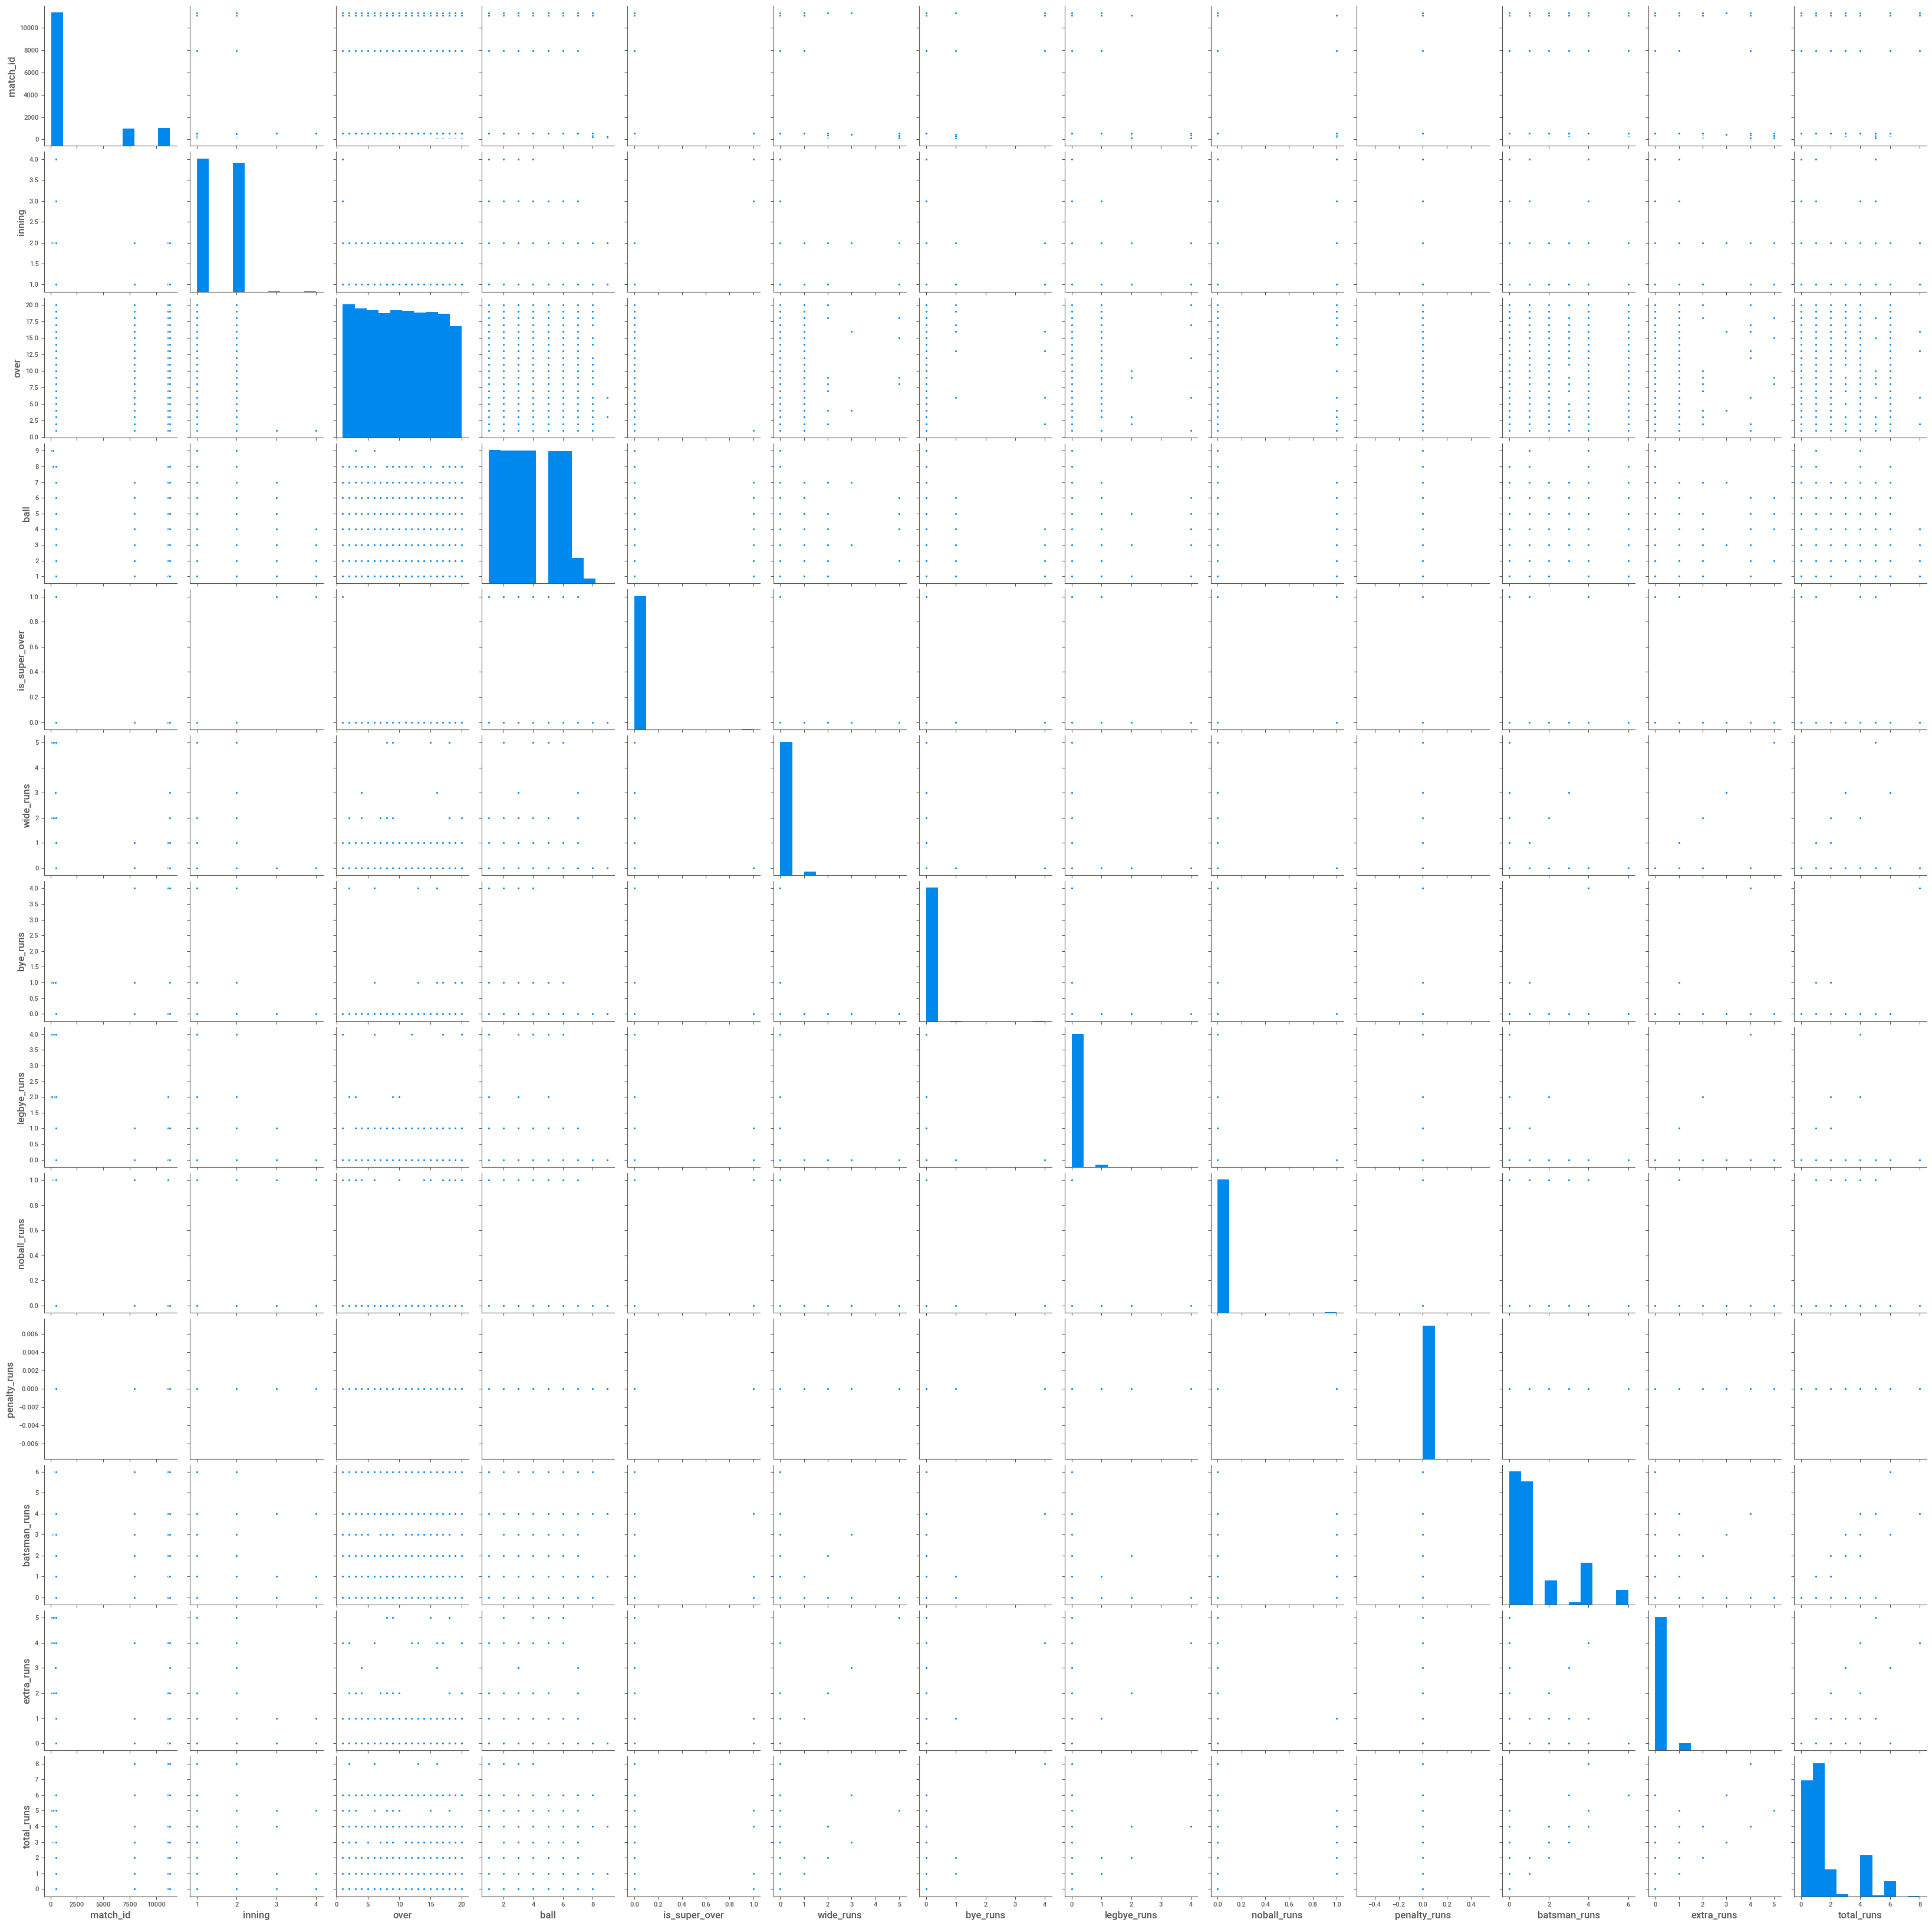

In [55]:
sns.pairplot(Rajastan_Punjab)

# It is difficult to interpret covariance.Let's try correlation

In [19]:
Rajastan_Punjab.cov()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
match_id,1.835513e+07,3.487854,150.702356,88.177882,0.0,34.002699,-0.851540,-2.191612,-4.065964,0.0,84.364151,26.893583,111.257734
inning,3.487854e+00,0.250042,-0.050496,-0.002377,0.0,-0.001737,-0.000401,-0.000195,0.000463,0.0,-0.025293,-0.001870,-0.027164
over,1.507024e+02,-0.050496,32.829317,-0.088173,0.0,-0.005294,0.010265,-0.029315,0.000641,0.0,0.829830,-0.023703,0.806127
ball,8.817788e+01,-0.002377,-0.088173,3.210820,0.0,-0.004520,0.012645,-0.004654,-0.003503,0.0,0.007620,-0.000032,0.007588
is_super_over,0.000000e+00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
wide_runs,3.400270e+01,-0.001737,-0.005294,-0.004520,0.0,0.045047,-0.000199,-0.000518,-0.000130,0.0,-0.017360,0.044201,0.026841
bye_runs,-8.515396e-01,-0.000401,0.010265,0.012645,0.0,-0.000199,0.020721,-0.000118,-0.000030,0.0,-0.003418,0.020375,0.016957
legbye_runs,-2.191612e+00,-0.000195,-0.029315,-0.004654,0.0,-0.000518,-0.000118,0.026016,-0.000077,0.0,-0.011828,0.025302,0.013475
noball_runs,-4.065964e+00,0.000463,0.000641,-0.003503,0.0,-0.000130,-0.000030,-0.000077,0.004368,0.0,0.002235,0.004132,0.006367
penalty_runs,0.000000e+00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000


In [20]:
Rajastan_Punjab.corr()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
match_id,1.000000,0.001628,0.006139,0.011486,NaN,0.037394,-0.001381,-0.003172,-0.014360,NaN,0.012181,0.020473,0.015963
inning,0.001628,1.000000,-0.017624,-0.002653,NaN,-0.016367,-0.005576,-0.002418,0.014013,NaN,-0.031289,-0.012199,-0.033391
over,0.006139,-0.017624,1.000000,-0.008588,NaN,-0.004353,0.012446,-0.031721,0.001694,NaN,0.089590,-0.013492,0.086482
ball,0.011486,-0.002653,-0.008588,1.000000,NaN,-0.011884,0.049024,-0.016103,-0.029583,NaN,0.002631,-0.000058,0.002603
is_super_over,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wide_runs,0.037394,-0.016367,-0.004353,-0.011884,NaN,1.000000,-0.006503,-0.015139,-0.009237,NaN,-0.050597,0.679218,0.077734
bye_runs,-0.001381,-0.005576,0.012446,0.049024,NaN,-0.006503,1.000000,-0.005083,-0.003101,NaN,-0.014686,0.461638,0.072411
legbye_runs,-0.003172,-0.002418,-0.031721,-0.016103,NaN,-0.015139,-0.005083,1.000000,-0.007220,NaN,-0.045361,0.511631,0.051352
noball_runs,-0.014360,0.014013,0.001694,-0.029583,NaN,-0.009237,-0.003101,-0.007220,1.000000,NaN,0.020916,0.203905,0.059214
penalty_runs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Correlation between Features.From the correlation plot we can clearly see that extra runs,wide runs ,bye runs are correlated and apart from that batsman runs column and total_runs columns are highly correlated

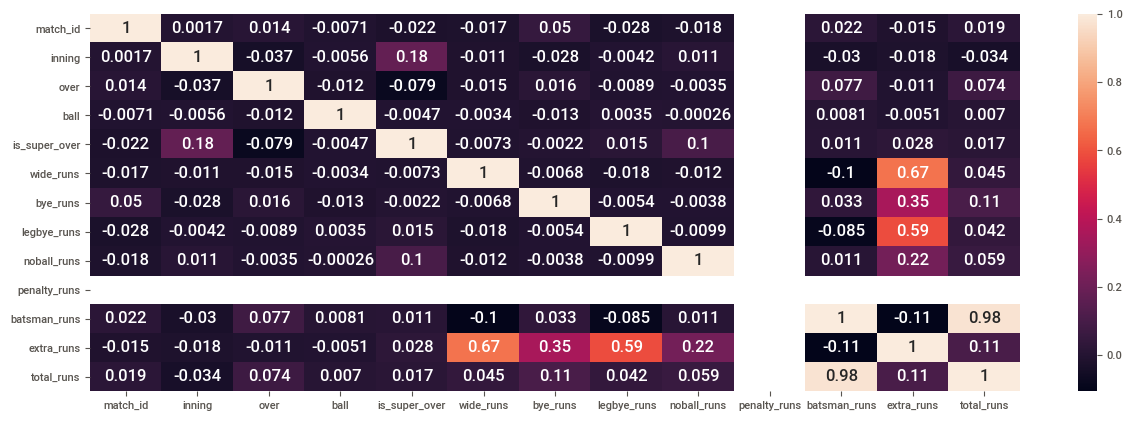

In [56]:
sns.heatmap(Rajastan_Punjab.corr(),yticklabels=True,annot=True)

In [57]:
Rajastan_Punjab.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,4663.000000,4663.000000,4663.000000,4663.000000,4663.000000,4663.000000,4663.000000,4663.000000,4663.000000,4663.0,4663.000000,4663.000000,4663.000000
mean,2265.082565,1.496462,10.301737,3.630710,0.002359,0.036028,0.005790,0.025091,0.006863,0.0,1.281793,0.073772,1.355565
std,3869.123810,0.508126,5.735677,1.816087,0.048517,0.240632,0.126704,0.211258,0.082565,0.0,1.619389,0.349241,1.619968
min,65.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,193.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,398.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,1.000000
75%,536.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,2.000000
max,11323.000000,4.000000,20.000000,9.000000,1.000000,5.000000,4.000000,4.000000,1.000000,0.0,6.000000,5.000000,8.000000


In [58]:
Rajastan_Punjab

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
15040,65,1,Kings XI Punjab,Rajasthan Royals,1,1,K Goel,JR Hopes,MM Patel,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
15041,65,1,Kings XI Punjab,Rajasthan Royals,1,2,K Goel,JR Hopes,MM Patel,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
15042,65,1,Kings XI Punjab,Rajasthan Royals,1,3,K Goel,JR Hopes,MM Patel,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
15043,65,1,Kings XI Punjab,Rajasthan Royals,1,4,K Goel,JR Hopes,MM Patel,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
15044,65,1,Kings XI Punjab,Rajasthan Royals,1,5,K Goel,JR Hopes,MM Patel,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172526,11323,2,Rajasthan Royals,Kings XI Punjab,20,2,STR Binny,JD Unadkat,Mohammed Shami,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
172527,11323,2,Rajasthan Royals,Kings XI Punjab,20,3,STR Binny,JD Unadkat,Mohammed Shami,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
172528,11323,2,Rajasthan Royals,Kings XI Punjab,20,4,STR Binny,JD Unadkat,Mohammed Shami,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
172529,11323,2,Rajasthan Royals,Kings XI Punjab,20,5,STR Binny,JD Unadkat,Mohammed Shami,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [59]:
RR_PUNjab=sweetviz.analyze([Rajastan_Punjab,'Rajastan_Punjab'])

:FEATURES DONE:                    |                     | [  0%]   00:10  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:01  -> (00:00 left)


Creating Associations graph... DONE!


In [61]:
RR_PUNjab.show_html()

# How many Dot balls ll be bowled in the entire match?

In [62]:
Dot_Balls=Rajastan_Punjab.loc[(Rajastan_Punjab['batsman_runs']==0)&(Rajastan_Punjab['total_runs']==0)]

In [63]:
len(Dot_Balls['match_id'].value_counts())

19

In [64]:
Dot_Balls.groupby('match_id').sum()

,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
match_id,,,,,,,,,,,,
65,148,888,389,0,0,0,0,0,0,0,0,0
97,127,784,300,0,0,0,0,0,0,0,0,0
130,154,881,361,0,0,0,0,0,0,0,0,0
145,158,934,360,0,0,0,0,0,0,0,0,0
193,111,719,266,0,0,0,0,0,0,0,0,0
212,99,615,261,0,0,0,0,0,0,0,0,0
256,130,871,304,0,0,0,0,0,0,0,0,0
311,107,648,260,0,0,0,0,0,0,0,0,0
354,148,895,351,0,0,0,0,0,0,0,0,0


In [66]:
Dot_Balls['total_runs'].value_counts()

0    1610
Name: total_runs, dtype: int64

In [67]:
print("Average number of Dot Balls Bowled in a single match",1610//19)

Average number of Dot Balls Bowled in a single match 84


# How many balls will Mohammed shami take to Get his First Wicket?

In [68]:
Mohammed_shami_First_Wicket=Rajastan_Punjab2.loc[(Rajastan_Punjab2['bowler']=='Mohammed Shami')]

In [75]:
Mohammed_shami_first_wicket=Mohammed_shami_First_Wicket.loc[Mohammed_shami_First_Wicket['noball_runs']==0]

In [76]:
Mohammed_shami_first_wicket

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
165594,11140,2,Rajasthan Royals,Kings XI Punjab,3,1,AM Rahane,JC Buttler,Mohammed Shami,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
165595,11140,2,Rajasthan Royals,Kings XI Punjab,3,2,JC Buttler,AM Rahane,Mohammed Shami,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
165596,11140,2,Rajasthan Royals,Kings XI Punjab,3,3,JC Buttler,AM Rahane,Mohammed Shami,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
165597,11140,2,Rajasthan Royals,Kings XI Punjab,3,4,JC Buttler,AM Rahane,Mohammed Shami,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
165598,11140,2,Rajasthan Royals,Kings XI Punjab,3,5,JC Buttler,AM Rahane,Mohammed Shami,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
165599,11140,2,Rajasthan Royals,Kings XI Punjab,3,6,JC Buttler,AM Rahane,Mohammed Shami,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
165606,11140,2,Rajasthan Royals,Kings XI Punjab,5,1,AM Rahane,JC Buttler,Mohammed Shami,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
165607,11140,2,Rajasthan Royals,Kings XI Punjab,5,2,AM Rahane,JC Buttler,Mohammed Shami,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
165608,11140,2,Rajasthan Royals,Kings XI Punjab,5,3,AM Rahane,JC Buttler,Mohammed Shami,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
165609,11140,2,Rajasthan Royals,Kings XI Punjab,5,4,JC Buttler,AM Rahane,Mohammed Shami,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [77]:
Mohammed_shami_first_wicket.groupby('match_id').sum()

,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
match_id,,,,,,,,,,,,
11140,48,258,84,0,0,0,0,0,0,33,0,33
11323,48,360,84,0,0,0,0,0,0,46,0,46


In [78]:
Mohammed_shami_first_wicket['dismissal_kind'].value_counts()

caught     2
run out    1
Name: dismissal_kind, dtype: int64

In [94]:
match_id=Mohammed_shami_First_Wicket['match_id']
dismissal_kind=Mohammed_shami_First_Wicket['dismissal_kind']
for ide,wicket in zip(x,y):
    print(ide,wicket)

11140 nan
11140 nan
11140 nan
11140 nan
11140 nan
11140 nan
11140 nan
11140 nan
11140 nan
11140 nan
11140 nan
11140 nan
11140 nan
11140 nan
11140 nan
11140 nan
11140 nan
11140 nan
11140 nan
11140 nan
11140 nan
11140 nan
11140 run out
11140 nan
11323 nan
11323 nan
11323 nan
11323 nan
11323 nan
11323 nan
11323 nan
11323 nan
11323 nan
11323 nan
11323 nan
11323 nan
11323 caught
11323 nan
11323 nan
11323 nan
11323 nan
11323 nan
11323 caught
11323 nan
11323 nan
11323 nan
11323 nan
11323 nan


In [98]:
print("In match_id 11140 Shami did not get wicket except the run out that does not count on his wicket")
print("In match_id 11323 Shami takes 13 balls to get his First wicket against RR")

In match_id 11140 Shami did not get wicket except the run out that does not count on his wicket
In match_id 11323 Shami takes 13 balls to get his First wicket against RR


In [96]:
print("Mohammed Shami takes 13 balls to get his first wicket")

Mohammed Shami takes 13 balls to get his first wicket


# Which batsman ll have highest runs scored through boundaries to total runs scored ration?

In [99]:
Sanju_Samson_ratio=Rajastan_Punjab2.loc[(Rajastan_Punjab2['batsman']=='SV Samson')]

In [100]:
Sanju_Samson_ratio

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
94296,398,2,Rajasthan Royals,Kings XI Punjab,13,6,SV Samson,AM Rahane,PP Chawla,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
94298,398,2,Rajasthan Royals,Kings XI Punjab,14,2,SV Samson,AM Rahane,Azhar Mahmood,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
94299,398,2,Rajasthan Royals,Kings XI Punjab,14,3,SV Samson,AM Rahane,Azhar Mahmood,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
94301,398,2,Rajasthan Royals,Kings XI Punjab,14,5,SV Samson,AM Rahane,Azhar Mahmood,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
94304,398,2,Rajasthan Royals,Kings XI Punjab,15,2,SV Samson,AM Rahane,PP Chawla,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172470,11323,2,Rajasthan Royals,Kings XI Punjab,11,2,SV Samson,RA Tripathi,M Ashwin,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
172472,11323,2,Rajasthan Royals,Kings XI Punjab,11,4,SV Samson,RA Tripathi,M Ashwin,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
172475,11323,2,Rajasthan Royals,Kings XI Punjab,12,1,SV Samson,RA Tripathi,R Ashwin,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
172477,11323,2,Rajasthan Royals,Kings XI Punjab,12,3,SV Samson,RA Tripathi,R Ashwin,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [114]:
len(Sanju_Samson_ratio['match_id'].value_counts())

10

In [101]:
Sanju_Samson_ratio['batsman_runs'].value_counts()

1    114
0     58
4     19
2     13
6      9
3      2
Name: batsman_runs, dtype: int64

In [115]:
Sanju_Samson_Boundary_Runs=((4*19)+(6*9))//10
Sanju_Samson_Boundary_Runs

13

In [116]:
Sanju_Samson_Total_Runs=((1*114)+130+(2*13)+(3*2))//13
Sanju_Samson_Total_Runs

21

In [117]:
Sanju_Samson_Ratio=Sanju_Samson_Boundary_Runs/Sanju_Samson_Total_Runs
Sanju_Samson_Ratio

0.6190476190476191

In [110]:
Steve_Smith_ratio=Rajastan_Punjab2.loc[(Rajastan_Punjab2['batsman']=='SPD Smith')]

In [118]:
len(Steve_Smith_ratio['match_id'].value_counts())

4

In [111]:
Steve_Smith_ratio['batsman_runs'].value_counts()

1    26
0    16
4    12
2     3
6     1
3     1
Name: batsman_runs, dtype: int64

In [119]:
Steve_Smith_Boundary_Runs=((4*12)+(6*1))//4
Steve_Smith_Boundary_Runs

13

In [120]:
Steve_Smith_Total_Runs=((1*26)+54+(2*3)+(3*1))//4
Steve_Smith_Total_Runs

22

In [121]:
Steve_Smith_Ratio=Steve_Smith_Boundary_Runs/Steve_Smith_Total_Runs
Steve_Smith_Ratio

0.5909090909090909

In [122]:
Jos_Buttler_ratio=Rajastan_Punjab2.loc[(Rajastan_Punjab2['batsman']=='JC Buttler')]

In [123]:
len(Jos_Buttler_ratio['match_id'].value_counts())

4

In [124]:
Jos_Buttler_ratio['batsman_runs'].value_counts()

1    66
0    48
4    28
2    12
6     5
3     2
Name: batsman_runs, dtype: int64

In [126]:
Jos_Buttler_Boundary_Runs=((4*28)+(6*5))//4
Jos_Buttler_Boundary_Runs

35

In [127]:
Jos_Buttler_Total_Runs=((1*66)+142+(2*12)+(3*2))//4
Jos_Buttler_Total_Runs

59

In [128]:
Jos_Buttler_Ratio=Jos_Buttler_Boundary_Runs/Jos_Buttler_Total_Runs
Jos_Buttler_Ratio

0.5932203389830508

In [131]:
Chris_Gayle_ratio=Rajastan_Punjab1.loc[(Rajastan_Punjab1['batsman']=='CH Gayle')]

In [132]:
len(Chris_Gayle_ratio['match_id'].value_counts())

4

In [133]:
Chris_Gayle_ratio['batsman_runs'].value_counts()

0    33
1    29
4    14
6     7
2     4
Name: batsman_runs, dtype: int64

In [134]:
Chris_Gayle_Boundary_Runs=((4*14)+(6*7))//4
Chris_Gayle_Boundary_Runs

24

In [135]:
(4*14)+(6*7)

98

In [136]:
Chris_Gayle_Total_Runs=((1*29)+98+(2*4)+(3*0))//4
Chris_Gayle_Total_Runs

33

In [137]:
Chris_Gayle_Ratio=Chris_Gayle_Boundary_Runs/Chris_Gayle_Total_Runs
Chris_Gayle_Ratio

0.7272727272727273

In [138]:
KL_Rahul_ratio=Rajastan_Punjab1.loc[(Rajastan_Punjab1['batsman']=='KL Rahul')]

In [139]:
len(KL_Rahul_ratio['match_id'].value_counts())

4

In [140]:
KL_Rahul_ratio['batsman_runs'].value_counts()

1    72
0    56
4    23
2    19
6     7
Name: batsman_runs, dtype: int64

In [141]:
KL_Rahul_Boundary_Runs=((4*23)+(6*7))//4
KL_Rahul_Boundary_Runs

33

In [142]:
(4*23)+(6*7)

134

In [143]:
KL_Rahul_Total_Runs=((1*72)+134+(2*19)+(3*0))//4
KL_Rahul_Total_Runs

61

In [144]:
KL_Rahul_Ratio=KL_Rahul_Boundary_Runs/KL_Rahul_Total_Runs
KL_Rahul_Ratio

0.5409836065573771

In [147]:
Robin_Uthappa_ratio=Deliveries.loc[(Deliveries['batsman']=='RV Uthappa')]

In [148]:
len(Robin_Uthappa_ratio['match_id'].value_counts())

170

In [149]:
Robin_Uthappa_ratio['batsman_runs'].value_counts()

0    1382
1    1295
4     436
2     206
6     156
3      13
5       4
Name: batsman_runs, dtype: int64

In [151]:
Robin_Uthappa_Boundary_Runs=((4*436)+(6*156))//170
Robin_Uthappa_Boundary_Runs

15

In [152]:
(4*436)+(6*156)

2680

In [153]:
Robin_Uthappa_Total_Runs=((1*1295)+2680+(2*206)+(3*13)+(5*4))//170
Robin_Uthappa_Total_Runs

26

In [154]:
Robin_Uthappa_Ratio=Robin_Uthappa_Boundary_Runs/Robin_Uthappa_Total_Runs
Robin_Uthappa_Ratio

0.5769230769230769

In [156]:
print("Runs scored throught Boundaries to Total runs scored in a match Ratio of Robin uthappa",Robin_Uthappa_Ratio)
print("Runs scored throught Boundaries to Total runs scored in a match Ratio of Jos Buttler",Jos_Buttler_Ratio)
print("Runs scored throught Boundaries to Total runs scored in a match Ratio of KL Rahul",KL_Rahul_Ratio)
print("Runs scored throught Boundaries to Total runs scored in a match Ratio of Chris Gayle",Chris_Gayle_Ratio)
print("Runs scored throught Boundaries to Total runs scored in a match Ratio of Steve Smith",Steve_Smith_Ratio)
print("Runs scored throught Boundaries to Total runs scored in a match Ratio of Sanju Samson",Sanju_Samson_Ratio)

Runs scored throught Boundaries to Total runs scored in a match Ratio of Robin uthappa 0.5769230769230769
Runs scored throught Boundaries to Total runs scored in a match Ratio of Jos Buttler 0.5932203389830508
Runs scored throught Boundaries to Total runs scored in a match Ratio of KL Rahul 0.5409836065573771
Runs scored throught Boundaries to Total runs scored in a match Ratio of Chris Gayle 0.7272727272727273
Runs scored throught Boundaries to Total runs scored in a match Ratio of Steve Smith 0.5909090909090909
Runs scored throught Boundaries to Total runs scored in a match Ratio of Sanju Samson 0.6190476190476191


# Overall player perfromance of batsman and bowlers

# opp_Chris_Gayle

In [159]:
opp_Chris_Gayle=Deliveries.loc[(Deliveries['batsman']=='CH Gayle')]

In [160]:
len(opp_Chris_Gayle['match_id'].value_counts())

124

In [161]:
opp_Chris_Gayle['batsman_runs'].value_counts()

0    1423
1     919
4     376
6     327
2      83
3       3
Name: batsman_runs, dtype: int64

In [171]:
Runs_Scored_By_Chris_Gayle=4560

In [168]:
Runs_Scored_By_Chris_Gayle_4s_6s=(6*327)+(4*376)
Runs_Scored_By_Chris_Gayle_4s_6s

3466

In [169]:
Runs_Scored_By_Chris_Gayle_1s_2s_3s=(1*919)+(2*83)+(3*3)
Runs_Scored_By_Chris_Gayle_1s_2s_3s

1094

In [162]:
Balls_Faced_By_Chris_Gayle=opp_Chris_Gayle.loc[(opp_Chris_Gayle['noball_runs']==0)&(opp_Chris_Gayle['wide_runs']==0)]

In [164]:
Balls_Faced_By_Chris_Gayle['ball'].value_counts()

2    512
4    476
3    474
1    470
5    466
6    442
7    104
8     19
9      3
Name: ball, dtype: int64

In [167]:
Balls_faced_By_Chris_Gayle=2966

In [173]:
Runs_Scored_By_Chris_Gayle/Balls_faced_By_Chris_Gayle

1.5374241402562374

In [174]:
Runs_Scored_By_Chris_Gayle_4s_6s-Runs_Scored_By_Chris_Gayle_1s_2s_3s

2372

In [176]:
Chris_Gayle_OPP=(1.5374241402562374+2372)/2966
Chris_Gayle_OPP

0.8002486258058855

# opp_KL_Rahul

In [177]:
opp_KL_Rahul=Deliveries.loc[(Deliveries['batsman']=='KL Rahul')]

In [178]:
opp_KL_Rahul['batsman_runs'].value_counts()

1    594
0    503
4    178
2    106
6     81
3      3
Name: batsman_runs, dtype: int64

In [179]:
Runs_Scored_By_KL_Rahul=2013

In [180]:
Runs_Scored_By_KL_Rahul_4s_6s=(6*81)+(4*178)
Runs_Scored_By_KL_Rahul_4s_6s

1198

In [189]:
Runs_Scored_By_KL_Rahul_1s_2s_3s=(1*594)+(2*106)+(3*3)
Runs_Scored_By_KL_Rahul_1s_2s_3s

815

In [182]:
Balls_Faced_By_KL_Rahul=opp_KL_Rahul.loc[(opp_KL_Rahul['noball_runs']==0)&(opp_KL_Rahul['wide_runs']==0)]

In [183]:
Balls_Faced_By_KL_Rahul['ball'].value_counts()

1    262
5    238
4    230
3    228
6    223
2    212
7     30
8      4
Name: ball, dtype: int64

In [184]:
Balls_faced_By_KL_Rahul=1427

In [185]:
Runs_Scored_By_KL_Rahul/Balls_faced_By_KL_Rahul

3.1955150665732304

In [188]:
Runs_Scored_By_KL_Rahul_4s_6s-Runs_Scored_By_KL_Rahul_1s_2s_3s

383

In [187]:
KL_Rahul_OPP=(3.1955150665732304+383)/1427
KL_Rahul_OPP

0.27063455856101837

# opp_Ben_Stokes

In [192]:
opp_Ben_Stokes=Deliveries.loc[(Deliveries['batsman']=='BA Stokes')]

In [193]:
opp_Ben_Stokes['batsman_runs'].value_counts()

1    231
0    148
2     44
4     43
6     25
3      2
Name: batsman_runs, dtype: int64

In [200]:
Runs_Scored_By_Ben_Stokes=629

In [194]:
Runs_Scored_By_Ben_Stokes_4s_6s=(6*25)+(4*43)
Runs_Scored_By_Ben_Stokes_4s_6s

322

In [195]:
Runs_Scored_By_Ben_Stokes_1s_2s_3s=(1*231)+(2*44)+(3*2)
Runs_Scored_By_Ben_Stokes_1s_2s_3s

325

In [196]:
Balls_Faced_By_Ben_Stokes=opp_Ben_Stokes.loc[(opp_Ben_Stokes['noball_runs']==0)&(opp_Ben_Stokes['wide_runs']==0)]

In [197]:
Balls_Faced_By_Ben_Stokes['ball'].value_counts()

3    89
1    84
6    79
2    75
5    69
4    66
7    13
8     2
9     1
Name: ball, dtype: int64

In [198]:
Balls_faced_By_Ben_Stokes=478

In [201]:
Runs_Scored_By_Ben_Stokes/Balls_faced_By_Ben_Stokes

1.3158995815899581

In [202]:
Runs_Scored_By_Ben_Stokes_4s_6s-Runs_Scored_By_Ben_Stokes_1s_2s_3s

-3

In [203]:
Ben_Stokes_OPP=(1.3158995815899581+(-3))/478
Ben_Stokes_OPP

-0.0035232226326569914

In [257]:
print("overall player performance of Ben stokes is",Ben_Stokes_OPP)
print("overall player performance of Chris Gayle is",Chris_Gayle_OPP)
print("overall player performance of  KL Rahuls is",KL_Rahul_OPP)

overall player performance of Ben stokes is -0.0035232226326569914
overall player performance of Chris Gayle is 0.8002486258058855
overall player performance of  KL Rahuls is 0.27063455856101837


 # Normalising Batsman Values

In [205]:
CG1=0.8002486258058855-(-0.0035232226326569914)

In [206]:
CG2=0.8002486258058855-(-0.0035232226326569914)

In [208]:
Normalising_Chris_Gayle=CG1/CG2
Normalising_Chris_Gayle

1.0

In [211]:
KL1=0.27063455856101837-(-0.0035232226326569914)

In [212]:
KL2=0.8002486258058855-(-0.0035232226326569914)

In [213]:
Normalising_KL_Rahul=KL1/KL2
Normalising_KL_Rahul

0.3410890562119977

In [216]:
BS1=-0.0035232226326569914-(-0.0035232226326569914)

In [217]:
BS2=0.8002486258058855-(-0.0035232226326569914)

In [219]:
Normalising_Ben_Stokes=BS1/BS2
Normalising_Ben_Stokes

0.0

# # Overall player perfromance of bowlers

# OPP_Jofra_Archer

In [224]:
OPP_Jofra_Archer=Deliveries.loc[(Deliveries['bowler']=='J Archer')]

In [226]:
OPP_Jofra_Archer['batsman_runs'].value_counts()

0    207
1    191
4     55
2     33
6     26
3      2
Name: batsman_runs, dtype: int64

In [227]:
Boundary_runs_JA=(4*55)+(6*26)
Boundary_runs_JA

376

In [229]:
No_OF_Boundary_JA=55+26
No_OF_Boundary_JA

81

In [230]:
OPP_Jofra_Archer['ball'].value_counts()

1    83
6    82
4    82
3    82
2    82
5    81
7    16
8     4
9     2
Name: ball, dtype: int64

In [231]:
No_OF_Balls_JA=514
No_OF_Balls_JA

514

In [232]:
Boundary_runs_JA/No_OF_Boundary_JA

4.6419753086419755

In [233]:
Jofra_Archer_opp=4.6419753086419755/514
Jofra_Archer_opp

0.009031080367007734

# OPP_Mohammed_Shami

In [234]:
OPP_Mohammed_Shami=Deliveries.loc[(Deliveries['bowler']=='Mohammed Shami')]

In [235]:
OPP_Mohammed_Shami['batsman_runs'].value_counts()

0    409
1    383
4    158
2     64
6     59
5      1
3      1
Name: batsman_runs, dtype: int64

In [239]:
Boundary_runs_MS=(4*158)+(6*59)
Boundary_runs_MS

986

In [240]:
No_OF_Boundary_MS=158+59
No_OF_Boundary_MS

217

In [241]:
OPP_Mohammed_Shami['ball'].value_counts()

2    173
1    173
6    172
5    172
4    172
3    172
7     35
8      5
9      1
Name: ball, dtype: int64

In [242]:
No_OF_Balls_MS=1075
No_OF_Balls_MS

1075

In [243]:
Boundary_runs_MS/No_OF_Boundary_MS

4.543778801843318

In [244]:
Mohammed_Shami_opp=4.543778801843318/1075
Mohammed_Shami_opp

0.0042267709784589

# # OPP_Rahul_Tewatia

In [248]:
OPP_Rahul_Tewatia=Deliveries.loc[(Deliveries['bowler']=='R Tewatia')]

In [249]:
OPP_Rahul_Tewatia['batsman_runs'].value_counts()

1    138
0    113
6     20
4     17
2     12
3      1
Name: batsman_runs, dtype: int64

In [250]:
Boundary_runs_RT=(4*17)+(6*20)
Boundary_runs_RT

188

In [251]:
No_OF_Boundary_RT=17+20
No_OF_Boundary_RT

37

In [252]:
OPP_Rahul_Tewatia['ball'].value_counts()

2    50
1    50
6    49
5    49
4    49
3    49
7     5
Name: ball, dtype: int64

In [253]:
No_OF_Balls_RT=301
No_OF_Balls_RT

301

In [254]:
Boundary_runs_RT/No_OF_Boundary_RT

5.081081081081081

In [255]:
Rahul_Tewatia_opp=5.081081081081081/301
Rahul_Tewatia_opp

0.01688066804345874

In [256]:
print("overall player performance of Jofra Archer is",Jofra_Archer_opp)
print("overall player performance of Mohammed Shami is",Mohammed_Shami_opp)
print("overall player performance of  Rahul Tewatia is",Rahul_Tewatia_opp)

overall player performance of Jofra Archer is 0.009031080367007734
overall player performance of Mohammed Shami is 0.0042267709784589
overall player performance of  Rahul Tewatia is 0.01688066804345874


# Normalising Bowler Values

In [264]:
JF1=0.0090310803670077341-0.0042267709784589

In [265]:
JF2=0.01688066804345874-0.0042267709784589

In [266]:
Normalising_Jofra_Archer=JF1/JF2
Normalising_Jofra_Archer

0.3796703390165355

In [267]:
MS1=0.0042267709784589-0.0042267709784589